# Data Exploration: Disease-Symptom Dataset

This notebook explores the medical dataset for the Bayesian network.

## Dataset Format
- **Disease**: The diagnosed disease
- **Symptom_1 to Symptom_17**: Symptom names (text) for each case
- **Format**: Each row represents a disease case with associated symptoms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load the Dataset

In [3]:
# Load training and testing data
df_train = pd.read_csv('../data/Training.csv')
df_test = pd.read_csv('../data/Testing.csv')

print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")
print(f"\nColumns: {list(df_train.columns)}")
print(f"\nFirst few rows:")
df_train.head()

Training data shape: (4428, 18)
Testing data shape: (492, 18)

Columns: ['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

First few rows:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,depression,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN
1,Malaria,chills,vomiting,high_fever,sweating,headache,nausea,diarrhoea,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dimorphic hemmorhoids(piles),constipation,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Peptic ulcer diseae,vomiting,loss_of_appetite,abdominal_pain,passage_of_gases,internal_itching,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronchial Asthma,fatigue,cough,high_fever,breathlessness,family_history,mucoid_sputum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Dataset Statistics

In [4]:
# Get basic statistics
print("Dataset Information:")
print(f"Total training samples: {len(df_train):,}")
print(f"Total test samples: {len(df_test):,}")
print(f"Total diseases: {df_train['Disease'].nunique()}")

print("\nDisease list:")
diseases = sorted(df_train['Disease'].unique())
for i, disease in enumerate(diseases, 1):
    print(f"{i:2d}. {disease}")

Dataset Information:
Total training samples: 4,428
Total test samples: 492
Total diseases: 41

Disease list:
 1. (vertigo) Paroymsal  Positional Vertigo
 2. AIDS
 3. Acne
 4. Alcoholic hepatitis
 5. Allergy
 6. Arthritis
 7. Bronchial Asthma
 8. Cervical spondylosis
 9. Chicken pox
10. Chronic cholestasis
11. Common Cold
12. Dengue
13. Diabetes 
14. Dimorphic hemmorhoids(piles)
15. Drug Reaction
16. Fungal infection
17. GERD
18. Gastroenteritis
19. Heart attack
20. Hepatitis B
21. Hepatitis C
22. Hepatitis D
23. Hepatitis E
24. Hypertension 
25. Hyperthyroidism
26. Hypoglycemia
27. Hypothyroidism
28. Impetigo
29. Jaundice
30. Malaria
31. Migraine
32. Osteoarthristis
33. Paralysis (brain hemorrhage)
34. Peptic ulcer diseae
35. Pneumonia
36. Psoriasis
37. Tuberculosis
38. Typhoid
39. Urinary tract infection
40. Varicose veins
41. hepatitis A


## 3. Disease Distribution

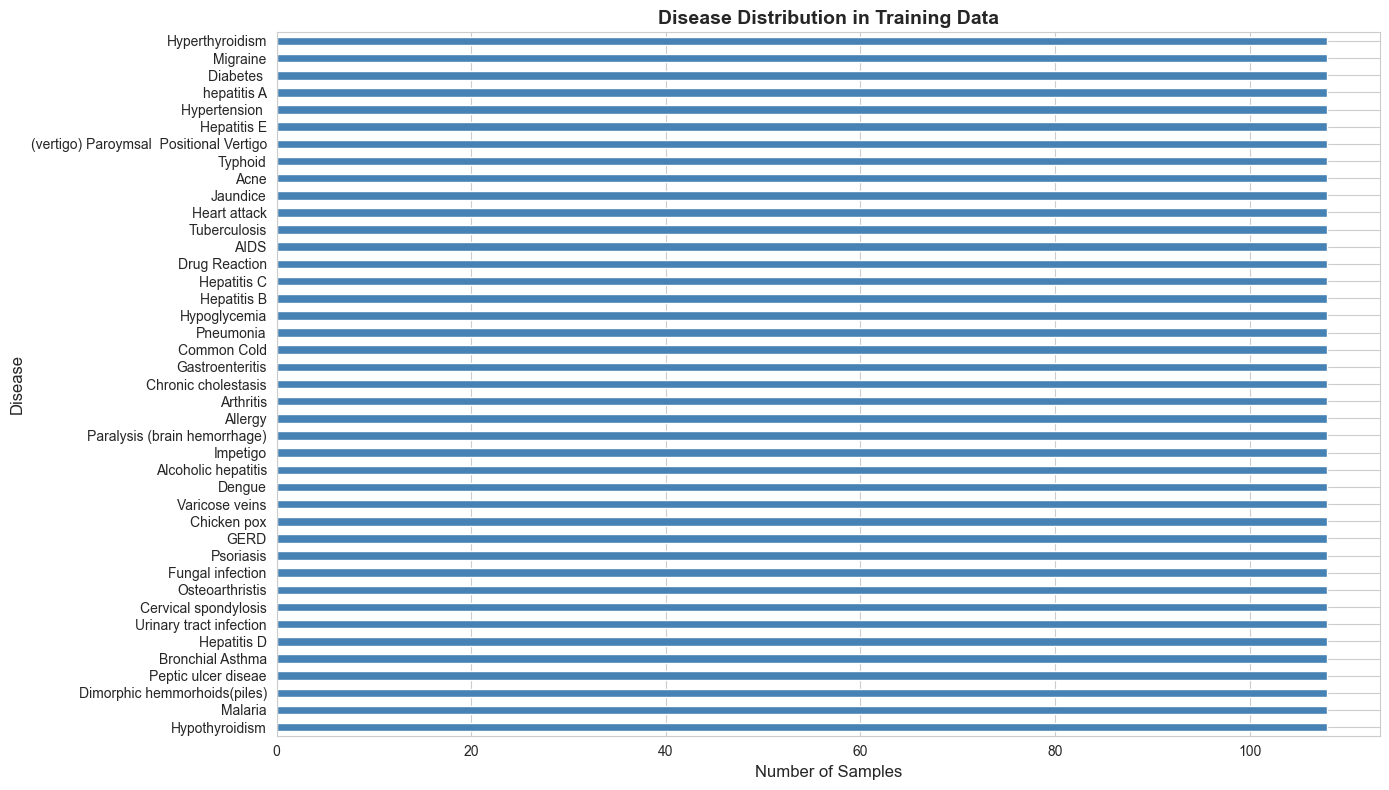


Min samples: 108
Max samples: 108
Average samples per disease: 108.0


In [5]:
# Plot disease distribution
disease_counts = df_train['Disease'].value_counts()

plt.figure(figsize=(14, 8))
disease_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Number of Samples', fontsize=12)
plt.ylabel('Disease', fontsize=12)
plt.title('Disease Distribution in Training Data', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nMin samples: {disease_counts.min()}")
print(f"Max samples: {disease_counts.max()}")
print(f"Average samples per disease: {disease_counts.mean():.1f}")

## 4. Extract All Symptoms

In [6]:
# Get all symptom columns
symptom_cols = [col for col in df_train.columns if col.startswith('Symptom_')]

# Collect all unique symptoms
all_symptoms = []
for col in symptom_cols:
    all_symptoms.extend(df_train[col].dropna().unique())

unique_symptoms = sorted(set(all_symptoms))
print(f"Total unique symptoms: {len(unique_symptoms)}")
print(f"\nFirst 20 symptoms:")
for i, symptom in enumerate(unique_symptoms[:20], 1):
    print(f"{i:2d}. {symptom}")

Total unique symptoms: 131

First 20 symptoms:
 1.  abdominal_pain
 2.  abnormal_menstruation
 3.  acidity
 4.  acute_liver_failure
 5.  altered_sensorium
 6.  anxiety
 7.  back_pain
 8.  belly_pain
 9.  blackheads
10.  bladder_discomfort
11.  blister
12.  blood_in_sputum
13.  bloody_stool
14.  blurred_and_distorted_vision
15.  breathlessness
16.  brittle_nails
17.  bruising
18.  burning_micturition
19.  chest_pain
20.  chills


## 5. Symptom Frequency Analysis

In [7]:
# Count symptom frequencies
symptom_counter = Counter()
for col in symptom_cols:
    symptom_counter.update(df_train[col].dropna())

# Convert to DataFrame for easier plotting
symptom_freq = pd.Series(symptom_counter).sort_values(ascending=False)

print(f"Top 20 most common symptoms:")
print(symptom_freq.head(20))

Top 20 most common symptoms:
 fatigue              1746
 vomiting             1719
 high_fever           1223
 loss_of_appetite     1035
 nausea               1032
 headache             1022
 abdominal_pain        929
 yellowish_skin        826
 yellowing_of_eyes     737
 chills                719
 skin_rash             709
 malaise               632
 chest_pain            626
 joint_pain            619
itching                613
 sweating              608
 dark_urine            513
 cough                 507
 diarrhoea             506
 irritability          427
dtype: int64


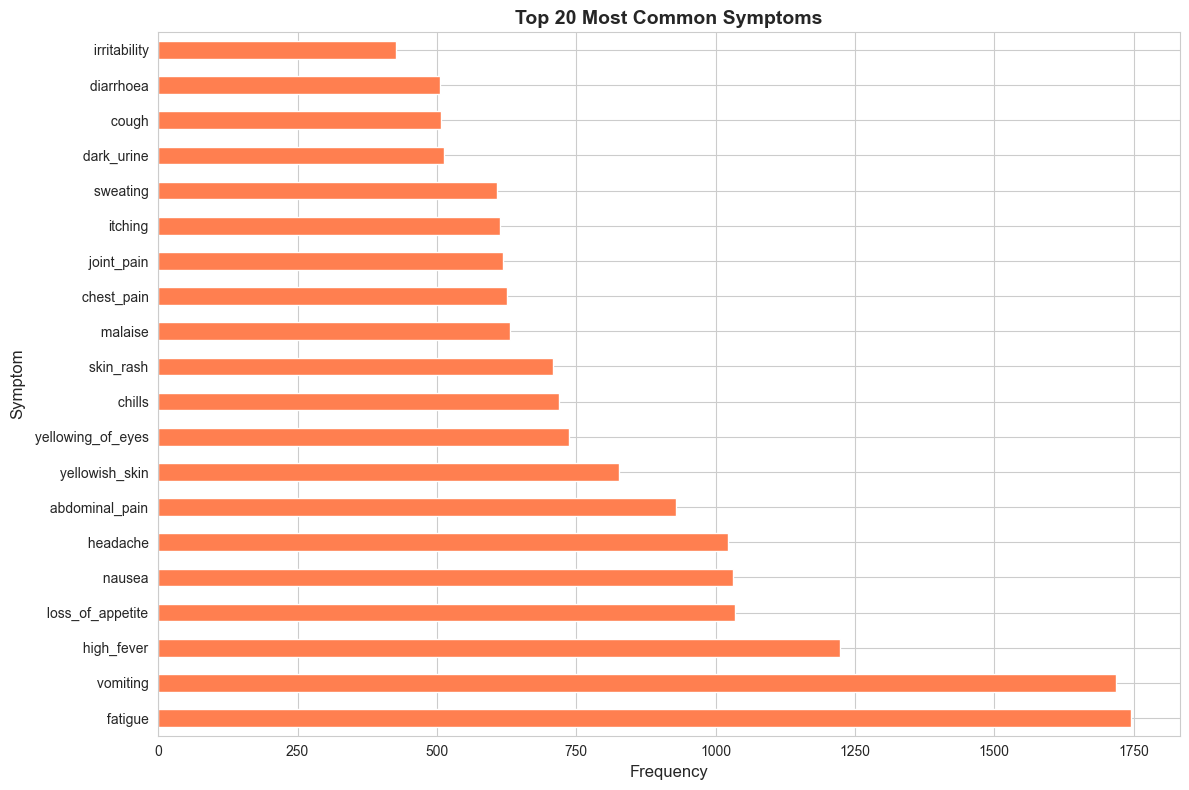

In [8]:
# Plot top 20 symptoms
plt.figure(figsize=(12, 8))
symptom_freq.head(20).plot(kind='barh', color='coral')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.title('Top 20 Most Common Symptoms', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 6. Symptoms per Disease Case

Average symptoms per case: 7.45
Min symptoms: 3
Max symptoms: 17


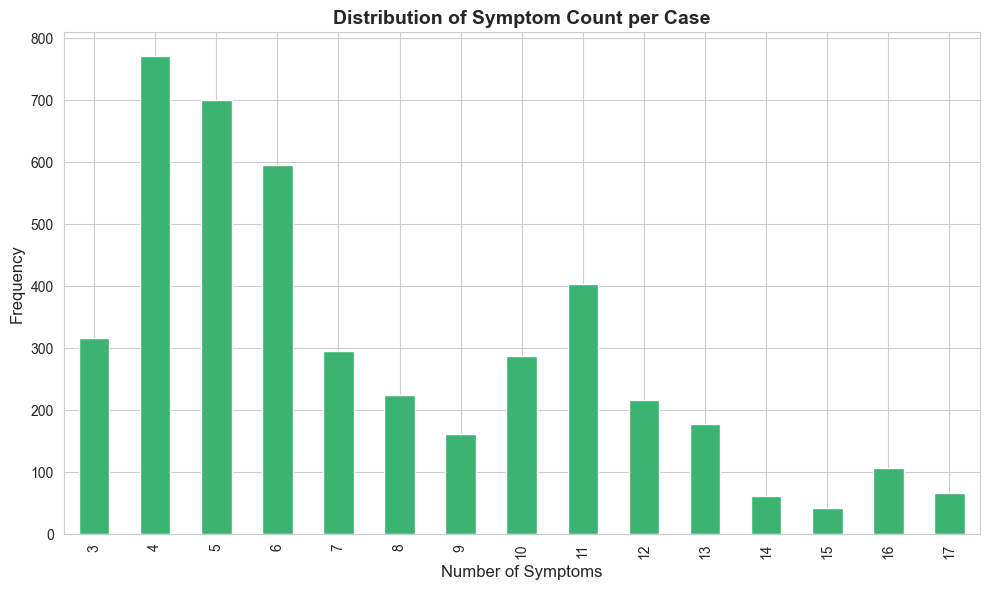

In [9]:
# Calculate number of symptoms per case
df_train['num_symptoms'] = df_train[symptom_cols].notna().sum(axis=1)

print(f"Average symptoms per case: {df_train['num_symptoms'].mean():.2f}")
print(f"Min symptoms: {df_train['num_symptoms'].min()}")
print(f"Max symptoms: {df_train['num_symptoms'].max()}")

# Plot distribution
plt.figure(figsize=(10, 6))
df_train['num_symptoms'].value_counts().sort_index().plot(kind='bar', color='mediumseagreen')
plt.xlabel('Number of Symptoms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Symptom Count per Case', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 7. Disease-Specific Symptom Analysis

In [10]:
# Function to get symptoms for a specific disease
def get_disease_symptoms(disease_name):
    disease_data = df_train[df_train['Disease'] == disease_name]
    symptoms = []
    for col in symptom_cols:
        symptoms.extend(disease_data[col].dropna().tolist())
    return Counter(symptoms)

# Example: Diabetes (if it exists)
if 'Diabetes' in diseases:
    diabetes_symptoms = get_disease_symptoms('Diabetes')
    print("Top symptoms for Diabetes:")
    for symptom, count in diabetes_symptoms.most_common(10):
        print(f"  {symptom}: {count}")
else:
    # Use first disease as example
    example_disease = diseases[0]
    disease_symptoms = get_disease_symptoms(example_disease)
    print(f"Top symptoms for {example_disease}:")
    for symptom, count in disease_symptoms.most_common(10):
        print(f"  {symptom}: {count}")

Top symptoms for (vertigo) Paroymsal  Positional Vertigo:
   nausea: 103
   vomiting: 102
   headache: 102
   loss_of_balance: 102
   unsteadiness: 102
   spinning_movements: 96


## 8. Create Disease-Symptom Mapping

In [11]:
# Create a comprehensive disease-symptom mapping
disease_symptom_map = {}

for disease in diseases:
    symptoms = get_disease_symptoms(disease)
    # Get symptoms that appear in at least 50% of cases
    disease_count = disease_counts[disease]
    common_symptoms = [s for s, c in symptoms.items() if c >= disease_count * 0.5]
    disease_symptom_map[disease] = common_symptoms

print("Disease-Symptom Mapping (symptoms in ≥50% of cases):")
for disease, symptoms in list(disease_symptom_map.items())[:5]:
    print(f"\n{disease}:")
    print(f"  {', '.join(symptoms) if symptoms else 'No symptoms meet threshold'}")

Disease-Symptom Mapping (symptoms in ≥50% of cases):

(vertigo) Paroymsal  Positional Vertigo:
   vomiting,  headache,  nausea,  spinning_movements,  loss_of_balance,  unsteadiness

AIDS:
   muscle_wasting,  patches_in_throat,  high_fever,  extra_marital_contacts

Acne:
   skin_rash,  pus_filled_pimples,  blackheads,  scurring

Alcoholic hepatitis:
   vomiting,  yellowish_skin,  abdominal_pain,  swelling_of_stomach,  distention_of_abdomen,  history_of_alcohol_consumption,  fluid_overload

Allergy:
   continuous_sneezing,  shivering,  chills,  watering_from_eyes


## 9. Data Quality Check

In [12]:
# Check for missing values
print("Missing Disease values:")
print(df_train['Disease'].isnull().sum())

print("\nMissing symptom values per column:")
for col in symptom_cols:
    missing = df_train[col].isnull().sum()
    print(f"{col}: {missing} ({missing/len(df_train)*100:.1f}%)")

# Check for any empty rows (no symptoms at all)
empty_rows = df_train[df_train[symptom_cols].isnull().all(axis=1)]
print(f"\nRows with no symptoms: {len(empty_rows)}")

Missing Disease values:
0

Missing symptom values per column:
Symptom_1: 0 (0.0%)
Symptom_2: 0 (0.0%)
Symptom_3: 0 (0.0%)
Symptom_4: 316 (7.1%)
Symptom_5: 1087 (24.5%)
Symptom_6: 1788 (40.4%)
Symptom_7: 2384 (53.8%)
Symptom_8: 2679 (60.5%)
Symptom_9: 2904 (65.6%)
Symptom_10: 3066 (69.2%)
Symptom_11: 3353 (75.7%)
Symptom_12: 3756 (84.8%)
Symptom_13: 3973 (89.7%)
Symptom_14: 4151 (93.7%)
Symptom_15: 4212 (95.1%)
Symptom_16: 4254 (96.1%)
Symptom_17: 4361 (98.5%)

Rows with no symptoms: 0


## 10. Summary

In [13]:
print("="*60)
print("DATASET SUMMARY")
print("="*60)
print(f"✓ Training samples: {len(df_train):,}")
print(f"✓ Test samples: {len(df_test):,}")
print(f"✓ Total diseases: {len(diseases)}")
print(f"✓ Total unique symptoms: {len(unique_symptoms)}")
print(f"✓ Average symptoms per case: {df_train['num_symptoms'].mean():.2f}")
print(f"✓ Samples per disease: {disease_counts.min()} - {disease_counts.max()}")
print(f"✓ Data quality: Good (some NaN values expected in symptom columns)")
print("\n✓ Ready for Bayesian Network training!")
print("="*60)

DATASET SUMMARY
✓ Training samples: 4,428
✓ Test samples: 492
✓ Total diseases: 41
✓ Total unique symptoms: 131
✓ Average symptoms per case: 7.45
✓ Samples per disease: 108 - 108
✓ Data quality: Good (some NaN values expected in symptom columns)

✓ Ready for Bayesian Network training!
